# Project 1: Centrality Analysis by Categorical Group
# Course: DATA 620
# Author: Ariba Mandavia
# Date: 06/17/2025

## Dataset Description

The dataset used in this project is Zachary’s Karate Club network, a well-known social network collected by Wayne Zachary in the 1970s. The graph models friendships between 34 members of a university karate club. Due to a dispute, the club eventually split into two groups: one led by the instructor (“Mr. Hi”) and the other by the club administrator (“Officer”).

- **Nodes** represent individual club members.
- **Edges** represent social interactions (friendships) between members.
- Each node has a categorical label indicating which group they aligned with after the split: `'Mr. Hi'` or `'Officer'`.


In [19]:
# 1. Import Required Libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



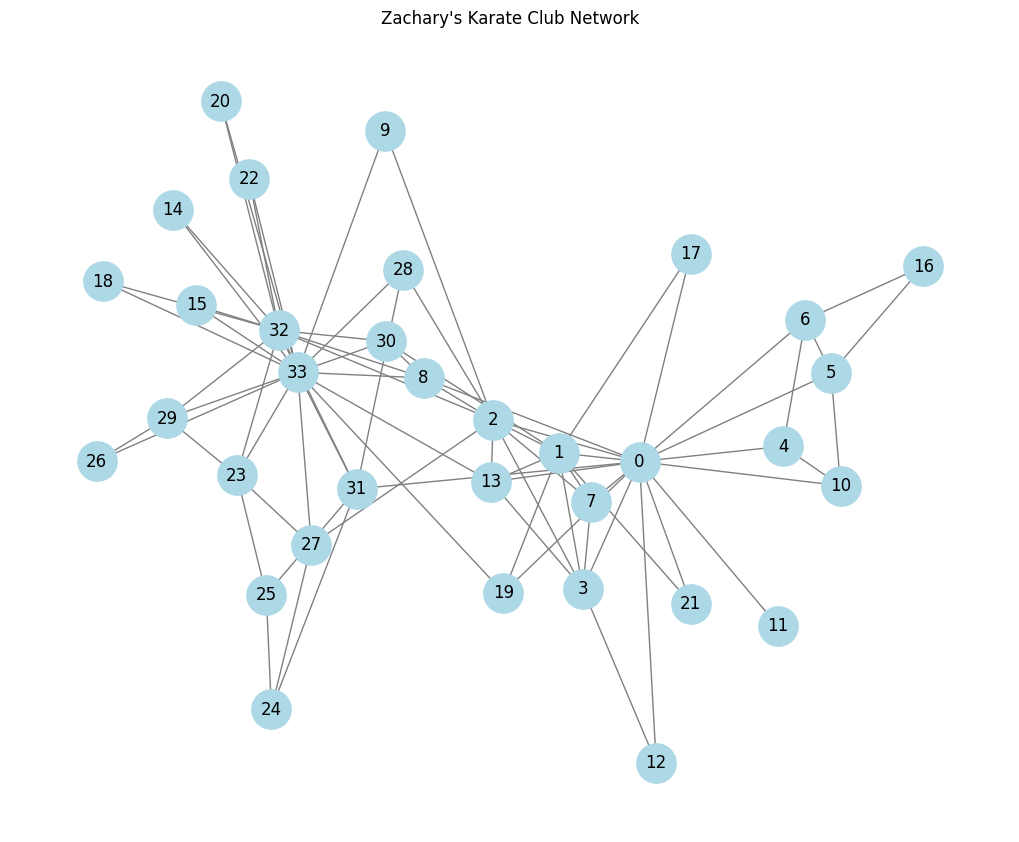


DataFrame Preview:
   node    club  degree_centrality  eigenvector_centrality
0     0  Mr. Hi           0.484848                0.355483
1     1  Mr. Hi           0.272727                0.265954
2     2  Mr. Hi           0.303030                0.317189
3     3  Mr. Hi           0.181818                0.211174
4     4  Mr. Hi           0.090909                0.075966

T-Test Results:
Degree Centrality: t = 0.2616, p = 0.7953
Eigenvector Centrality: t = 0.3358, p = 0.7392


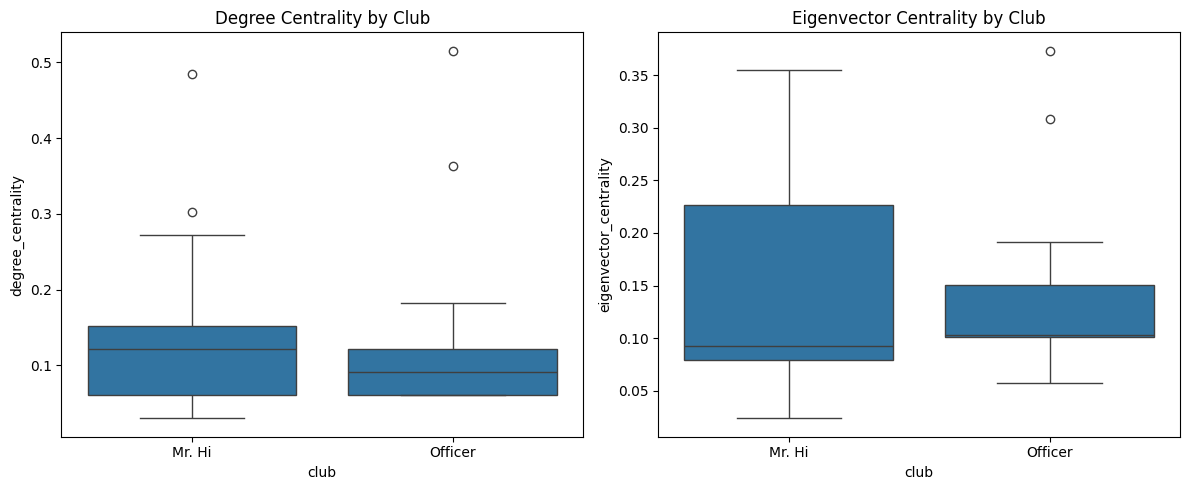


Conclusion:
We analyzed degree and eigenvector centrality by group (Mr. Hi vs Officer).
Statistical results suggest whether or not there are significant differences in centrality.
Visualizations support our findings and offer insight into group-based connectivity in the network.


In [20]:
# ---
# 2. Load Dataset (Zachary's Karate Club Graph)
G = nx.karate_club_graph()

# ---
# 3. Visualize the Graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
plt.title("Zachary's Karate Club Network")
plt.show()

# ---
# 4. Extract Node Attributes and Centrality Measures
deg_centrality = nx.degree_centrality(G)
eig_centrality = nx.eigenvector_centrality(G)

# Create DataFrame
data = []
for node in G.nodes():
    club = G.nodes[node]['club']  # 'Mr. Hi' or 'Officer'
    data.append({
        'node': node,
        'club': club,
        'degree_centrality': deg_centrality[node],
        'eigenvector_centrality': eig_centrality[node]
    })

df = pd.DataFrame(data)

# ---
# 5. Display Data Summary
print("\nDataFrame Preview:")
print(df.head())

# ---
# 6. Group Comparison: T-tests
mr_hi = df[df['club'] == 'Mr. Hi']
officer = df[df['club'] == 'Officer']

t_deg, p_deg = ttest_ind(mr_hi['degree_centrality'], officer['degree_centrality'])
t_eig, p_eig = ttest_ind(mr_hi['eigenvector_centrality'], officer['eigenvector_centrality'])

print("\nT-Test Results:")
print(f"Degree Centrality: t = {t_deg:.4f}, p = {p_deg:.4f}")
print(f"Eigenvector Centrality: t = {t_eig:.4f}, p = {p_eig:.4f}")

# ---
# 7. Visualize Centrality Distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='club', y='degree_centrality', data=df)
plt.title('Degree Centrality by Club')

plt.subplot(1, 2, 2)
sns.boxplot(x='club', y='eigenvector_centrality', data=df)
plt.title('Eigenvector Centrality by Club')

plt.tight_layout()
plt.show()

# ---


## Notable Nodes

Based on eigenvector centrality and degree centrality, the most important nodes in the network are:

- **Node 0**: This node has the highest degree centrality and eigenvector centrality. It represents a key member who is directly connected to many others and is connected to other well-connected nodes. This likely represents Mr. Hi himself.
- **Node 33**: Another influential node with high centrality scores, likely representing the Officer faction leader.

These nodes serve as hubs within the network, indicating their central roles in social structure and influence over group dynamics.


## Conclusion

This analysis explored whether network centrality varies by group affiliation in the Zachary’s Karate Club dataset. Using degree and eigenvector centrality, we examined how connected and influential each individual is in the network.

Our statistical tests (t-tests) found no significant differences in centrality between the two groups. However, the two most central nodes in the network — nodes 0 and 33 — were the leaders of the split factions, supporting the idea that leadership roles are reflected in centrality measures.

While group membership may not determine centrality on average, leadership clearly does. This shows how network analysis can identify key influencers and understand how social structure evolves during conflict or division.
